In [1]:
'''
graphs_descriptiveStats.py

Requiere los paquetes numpy, pandas, matplotlib y statsmodels.

Ver requirement.txt y README.txt para informacion adicional.
'''

# Librerias

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm


# Obtencion de datos

path = 'https://git.io/JuGLW'


stocks  = pd.read_excel(path, sheet_name = 'stocks_raw', index_col = 0)
r_stocks = 100 * (np.log(stocks) - np.log(stocks.shift(1)))

  # Series del mercado cambiario
  
forex  = pd.read_excel(path, sheet_name = 'forex_raw', index_col = 0)
r_forex = 100 * (np.log(forex) - np.log(forex.shift(1)))


# Etiquetas

stock_name = ['MERVAL', 'IBOV', 'IPSA', 'IGBC', 'MEXBOL', 'SPBLPGPTR']
forex_name = ['ARS', 'BRL', 'CLP', 'COP', 'MXN', 'PEN']

country    = ['(a) Argentina', '(b) Brazil', '(b) Chile', '(c) Colombia', 
              '(e) Mexico', '(f) Peru']

#############
# Funciones #
#############
      
def estadisticos_descriptivos(df):

  # Se selecciona el numero de observaciones, la desviacion estandar, valor
  # minimo, maxico, simetria y kurtosis.

  estadisticos_descriptivos = pd.concat([df.describe()\
                            .loc[['count', 'mean', 'std', 'min', 'max']].T, 
                            df.skew().rename('skew'), df.kurt().\
                            rename('kurt')], axis=1).round(2)

  estadisticos_descriptivos['count'] = estadisticos_descriptivos['count'].astype(int)

  # Fecha de inicio

  fecha_inicio = df.apply(lambda df: df.first_valid_index())
  fecha_inicio = pd.DataFrame(fecha_inicio, columns=['Fecha Inicio'])

  # Fecha de fin
  fecha_fin = df.apply(lambda df: df.last_valid_index())
  fecha_fin = pd.DataFrame(fecha_fin, columns=['Fecha Fin'])

  estadisticos_descriptivos = pd.concat([fecha_inicio, fecha_fin, 
                                         estadisticos_descriptivos], axis = 1)

  return estadisticos_descriptivos


def export(df, file_name, Excel = None, LaTeX = None):

  # Exportar a Excel

  if Excel == True:

    df.to_excel(file_name + '.xlsx')  

  # Exportar a LaTeX

  if LaTeX == True:
    latex_code = df.to_latex()

    with open(file_name + '.tex', 'w') as tex:
      tex.write(latex_code)


def price2ret(price):
  
  ret = (100 * (np.log(price) - np.log(price.shift(1))))
  
  return ret


def graf_precio(df, country):

  '''
  Realiza subgraficos de las series en niveles para un df. La función requiere 
  que el índice sea una columna fecha. Asi mismo, se requiere numpy, 
  pandas y matplotlib.

  Entradas:

    df      (array_like) Series a graficar. 

    country (str, opc) Nombres de los países a mostrarse en cada subgrafico.

  '''

  # Dimensiones subgrafico
    
  nrows = np.ceil(df.shape[1] / 2).astype(int) 
  ncols = 2   
  fig, axes = plt.subplots(nrows, ncols, figsize=(16, 10))
  plt.subplots_adjust(wspace=0.3, hspace=0.3)

  # Generacion de subgraficos 

  for col, ax in zip(df.columns, axes.flatten()):

    serie = df[col].dropna()   # Serie

    # Subgrafico

    ax.plot(serie)

      # Etiquetas

    ax.set_xlabel(" $\it{"+country[df.columns.get_loc(col)]+"}$",
                  fontname= 'Times New Roman', fontsize=12) 
    
    ax.grid(color="grey", linestyle="--", linewidth=0.5)


def graf_ret(df, country, ret2):

  '''
  Realiza subgraficos de las series de retornos contenidas en un df. La función
  requiere que el índice sea una columna fecha. Asi mismo, se requiere numpy, 
  pandas y matplotlib.

  Entradas:

    df      (array_like) Series a graficar. 

    country (str, opc) Nombres de los países a mostrarse en cada subgrafico.

    ret2    (bool) Si 'True' grafica los retornos al cuadrado.'

  '''

  # Verifica si se solicita el grafico de los retornos al cuadrado

  if ret2 == True:
    power = 2
  elif ret2 == False:
    power = 1
 
  df = df ** power # Para retornos^2, si es solicitado

  # Dimensiones subgrafico
    
  nrows = np.ceil(df.shape[1] / 2).astype(int) 
  ncols = 2   
  fig, axes = plt.subplots(nrows, ncols, figsize=(16, 10))
  plt.subplots_adjust(wspace=0.3, hspace=0.3)

  # Generacion de subgraficos 

  for col, ax in zip(df.columns, axes.flatten()):

    serie = df[col].dropna()   # Serie

    # Subgrafico

    ax.plot(serie)

    # Preferencias

      # Limites horizontales
    ax.set_xlim([serie.index[0],serie.index[-1]]) 

      # Limites verticales 
    if ret2 == False:              # Se omite si son ret^2

      maxL = max(serie)
      minL = min(serie)

      rang = max(maxL, abs(minL))
      A = round(rang/10.0) * 10 + 10
      ax.set_ylim([-A, A])

    else:
      ax.set_ylim(0)

      # Etiquetas

    ax.set_xlabel(country[df.columns.get_loc(col)],fontname= 'Times New Roman', fontsize=12) 
    
    ax.grid(color="grey", linestyle="--", linewidth=0.5)


def grafs_densidad(df, country, market):

  '''

  Realiza subgraficos de la funciones de densidad para las series contenidas 
  en df. Se requiere numpy, math, pandas, scipy.stats y matplotlib.

  Entradas:

    df       (array_like) Series a graficar. 

    country  (str, opc) Nombres de los países a mostrarse en cada subgrafico.

    market   (str, opc) Nombres de los mercados a mostrarse en cada subgrafico.

  '''
  
  # Distribucion normal

  mu = 0
  variance = 1
  sigma = math.sqrt(variance)
  x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)

  # Dimensiones subgrafico

  nrows = np.ceil(df.shape[1] / 2).astype(int) 
  ncols = 2   
  fig, axes = plt.subplots(nrows, ncols, figsize=(16, 10))
  plt.subplots_adjust(wspace=0.3, hspace=0.3)

  # Generacion de subgraficos 

  for col, ax in zip(df.columns, axes.flatten()):

    serie = df[col].dropna()                    # Serie

    # Subgrafico

    ax.plot(x, stats.norm.pdf(x, mu, sigma), label  =r'$\mathcal{N}(0,1)$',
            linestyle = '--', color = 'k')
    
    serie.plot(ax=ax, kind='kde', label = market[df.columns.get_loc(col)], 
               color = 'k')

    # Preferencias

    ax.set_ylabel('')
    ax.set_ylim(0)
    ax.set_xlabel(" $\it{"+country[df.columns.get_loc(col)]+"}$",
                  fontname= 'Times New Roman', fontsize=12) 
    ax.legend()


def grafs_acf(df, country):

  '''

  Realiza subgraficos del autocorrelograma para las series contenidas en df. 
  Se requiere numpy, pandas, statsmodels y matplotlib.

  Entradas:

    df       (array_like) Series a graficar. 

    country  (str, opc) Nombres de los países a mostrarse en cada subgrafico.

  '''

  # Dimensiones subgrafico

  nrows = np.ceil(df.shape[1] / 2).astype(int) 
  ncols = 2  
  fig, axes = plt.subplots(nrows, ncols, figsize=(16, 10))
  plt.subplots_adjust(wspace=0.3, hspace=0.3)

  # Generacion de subgraficos 

  for col, ax in zip(df.columns, axes.flatten()):

    serie  = df[col].dropna()                      # serie

    # Subgrafico

    sm.graphics.tsa.plot_acf(serie.values, ax = ax, lags = 50, 
                             color = 'black', title = " $\it{"+country\
                             [df.columns.get_loc(col)]+"}$")
    
    # Preferencias

    ax.grid(color = "grey", linestyle = "--", linewidth=0.5)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


HTTPError: ignored

In [30]:
'''
graphs_descriptiveStats.py

Requiere los paquetes numpy, pandas, matplotlib y statsmodels.

Ver requirement.txt y README.txt para informacion adicional.
'''

# Librerias

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm


# Data collection

path = "https://git.io/JX83R"

prices  = pd.read_excel(path, index_col = 0)
returns = 100 * (np.log(prices) - np.log(prices.shift(1)))

r_forex = returns.iloc[:, :6]
r_stocks = returns.iloc[:, 6:]

# Etiquetas

stock_name = ['MERVAL', 'IBOV', 'IPSA', 'IGBC', 'MEXBOL', 'SPBLPGPTR']
forex_name = ['ARS', 'BRL', 'CLP', 'COP', 'MXN', 'PEN']

country    = ['(a) Argentina', '(b) Brazil', '(b) Chile', '(c) Colombia', 
              '(e) Mexico', '(f) Peru']

#############
# Funciones #
#############
      
def estadisticos_descriptivos(df):

  # Se selecciona el numero de observaciones, la desviacion estandar, valor
  # minimo, maxico, simetria y kurtosis.

  estadisticos_descriptivos = pd.concat([df.describe()\
                            .loc[['count', 'mean', 'std', 'min', 'max']].T, 
                            df.skew().rename('skew'), df.kurt().\
                            rename('kurt')], axis=1).round(2)

  estadisticos_descriptivos['count'] = estadisticos_descriptivos['count'].astype(int)

  # Fecha de inicio

  fecha_inicio = df.apply(lambda df: df.first_valid_index())
  fecha_inicio = pd.DataFrame(fecha_inicio, columns=['Fecha Inicio'])

  # Fecha de fin
  fecha_fin = df.apply(lambda df: df.last_valid_index())
  fecha_fin = pd.DataFrame(fecha_fin, columns=['Fecha Fin'])

  estadisticos_descriptivos = pd.concat([fecha_inicio, fecha_fin, 
                                         estadisticos_descriptivos], axis = 1)

  return estadisticos_descriptivos


def export(df, file_name, Excel = None, LaTeX = None):

  # Exportar a Excel

  if Excel == True:

    df.to_excel(file_name + '.xlsx')  

  # Exportar a LaTeX

  if LaTeX == True:
    latex_code = df.to_latex()

    with open(file_name + '.tex', 'w') as tex:
      tex.write(latex_code)


def price2ret(price):
  
  ret = (100 * (np.log(price) - np.log(price.shift(1))))
  
  return ret


def graf_precio(df, country):

  '''
  Realiza subgraficos de las series en niveles para un df. La función requiere 
  que el índice sea una columna fecha. Asi mismo, se requiere numpy, 
  pandas y matplotlib.

  Entradas:

    df      (array_like) Series a graficar. 

    country (str, opc) Nombres de los países a mostrarse en cada subgrafico.

  '''

  # Dimensiones subgrafico
    
  nrows = np.ceil(df.shape[1] / 2).astype(int) 
  ncols = 2   
  fig, axes = plt.subplots(nrows, ncols, figsize=(16, 10))
  plt.subplots_adjust(wspace=0.3, hspace=0.3)

  # Generacion de subgraficos 

  for col, ax in zip(df.columns, axes.flatten()):

    serie = df[col].dropna()   # Serie

    # Subgrafico

    ax.plot(serie)

      # Etiquetas

    ax.set_xlabel(" $\it{"+country[df.columns.get_loc(col)]+"}$",
                  fontname= 'Times New Roman', fontsize=12) 
    
    ax.grid(color="grey", linestyle="--", linewidth=0.5)


def graf_ret(df, country, ret2):

  '''
  Realiza subgraficos de las series de retornos contenidas en un df. La función
  requiere que el índice sea una columna fecha. Asi mismo, se requiere numpy, 
  pandas y matplotlib.

  Entradas:

    df      (array_like) Series a graficar. 

    country (str, opc) Nombres de los países a mostrarse en cada subgrafico.

    ret2    (bool) Si 'True' grafica los retornos al cuadrado.'

  '''

  # Verifica si se solicita el grafico de los retornos al cuadrado

  if ret2 == True:
    power = 2
  elif ret2 == False:
    power = 1
 
  df = df ** power # Para retornos^2, si es solicitado

  # Dimensiones subgrafico
    
  nrows = np.ceil(df.shape[1] / 2).astype(int) 
  ncols = 2   
  fig, axes = plt.subplots(nrows, ncols, figsize=(16, 10))
  plt.subplots_adjust(wspace=0.3, hspace=0.3)

  # Generacion de subgraficos 

  for col, ax in zip(df.columns, axes.flatten()):

    serie = df[col].dropna()   # Serie

    # Subgrafico

    ax.plot(serie)

    # Preferencias

      # Limites horizontales
    ax.set_xlim([serie.index[0],serie.index[-1]]) 

      # Limites verticales 
    if ret2 == False:              # Se omite si son ret^2

      maxL = max(serie)
      minL = min(serie)

      rang = max(maxL, abs(minL))
      A = round(rang/10.0) * 10 + 10
      ax.set_ylim([-A, A])

    else:
      ax.set_ylim(0)

      # Etiquetas

    ax.set_xlabel(country[df.columns.get_loc(col)],fontname= 'Times New Roman', fontsize=12) 
    
    ax.grid(color="grey", linestyle="--", linewidth=0.5)


def grafs_densidad(df, country, market):

  '''

  Realiza subgraficos de la funciones de densidad para las series contenidas 
  en df. Se requiere numpy, math, pandas, scipy.stats y matplotlib.

  Entradas:

    df       (array_like) Series a graficar. 

    country  (str, opc) Nombres de los países a mostrarse en cada subgrafico.

    market   (str, opc) Nombres de los mercados a mostrarse en cada subgrafico.

  '''
  
  # Distribucion normal

  mu = 0
  variance = 1
  sigma = math.sqrt(variance)
  x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)

  # Dimensiones subgrafico

  nrows = np.ceil(df.shape[1] / 2).astype(int) 
  ncols = 2   
  fig, axes = plt.subplots(nrows, ncols, figsize=(16, 10))
  plt.subplots_adjust(wspace=0.3, hspace=0.3)

  # Generacion de subgraficos 

  for col, ax in zip(df.columns, axes.flatten()):

    serie = df[col].dropna()                    # Serie

    # Subgrafico

    ax.plot(x, stats.norm.pdf(x, mu, sigma), label  =r'$\mathcal{N}(0,1)$',
            linestyle = '--', color = 'k')
    
    serie.plot(ax=ax, kind='kde', label = market[df.columns.get_loc(col)], 
               color = 'k')

    # Preferencias

    ax.set_ylabel('')
    ax.set_ylim(0)
    ax.set_xlabel(" $\it{"+country[df.columns.get_loc(col)]+"}$",
                  fontname= 'Times New Roman', fontsize=12) 
    ax.legend()


def grafs_acf(df, country):

  '''

  Realiza subgraficos del autocorrelograma para las series contenidas en df. 
  Se requiere numpy, pandas, statsmodels y matplotlib.

  Entradas:

    df       (array_like) Series a graficar. 

    country  (str, opc) Nombres de los países a mostrarse en cada subgrafico.

  '''

  # Dimensiones subgrafico

  nrows = np.ceil(df.shape[1] / 2).astype(int) 
  ncols = 2  
  fig, axes = plt.subplots(nrows, ncols, figsize=(16, 10))
  plt.subplots_adjust(wspace=0.3, hspace=0.3)

  # Generacion de subgraficos 

  for col, ax in zip(df.columns, axes.flatten()):

    serie  = df[col].dropna()                      # serie

    # Subgrafico

    sm.graphics.tsa.plot_acf(serie.values, ax = ax, lags = 50, 
                             color = 'black', title = " $\it{"+country\
                             [df.columns.get_loc(col)]+"}$")
    
    # Preferencias

    ax.grid(color = "grey", linestyle = "--", linewidth=0.5)

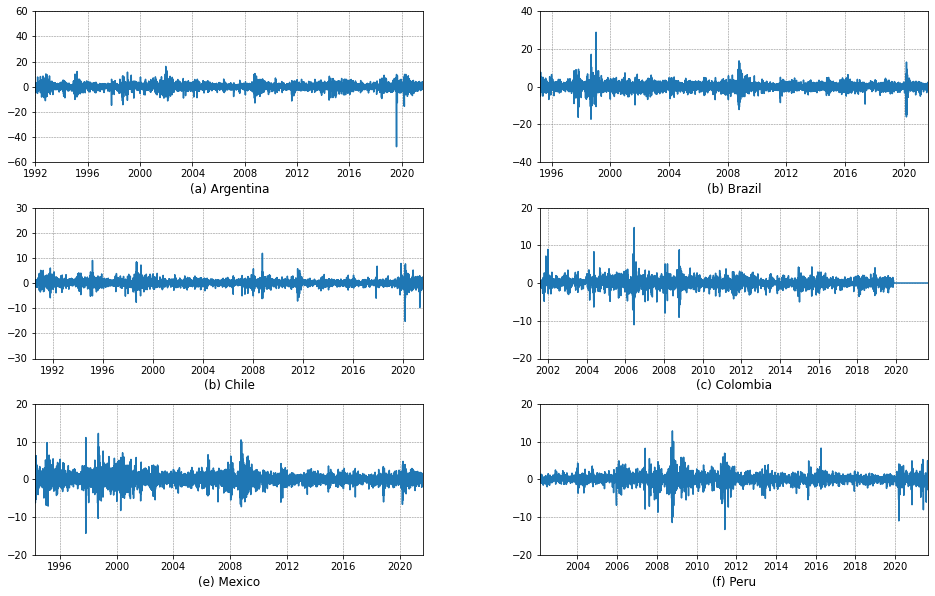

In [31]:
# Retornos 

graf_ret(r_stocks, country, ret2 = False)

plt.savefig('graph_stockRet.pdf')

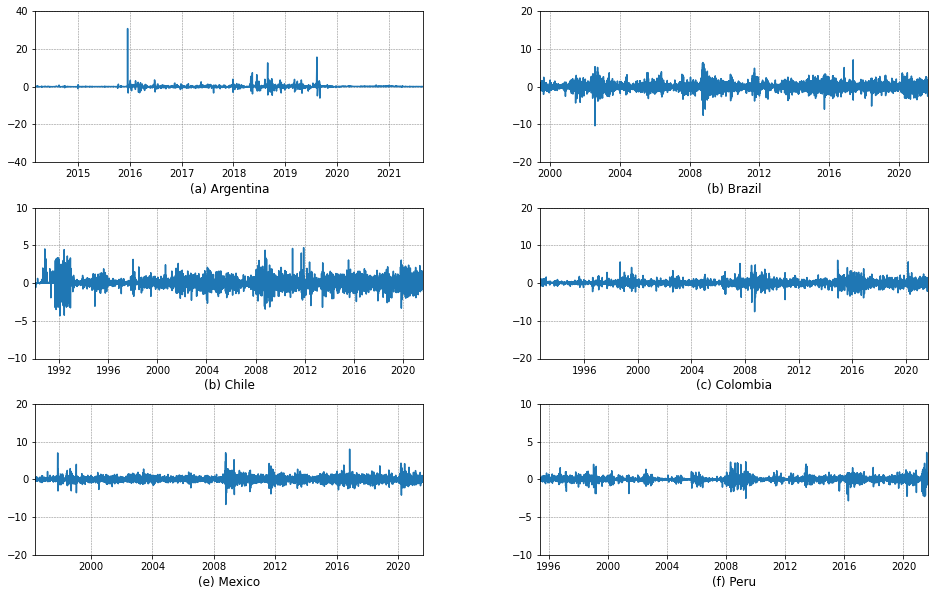

In [32]:
graf_ret(r_forex, country, ret2 = False)

plt.savefig('graph_forexRet.pdf')

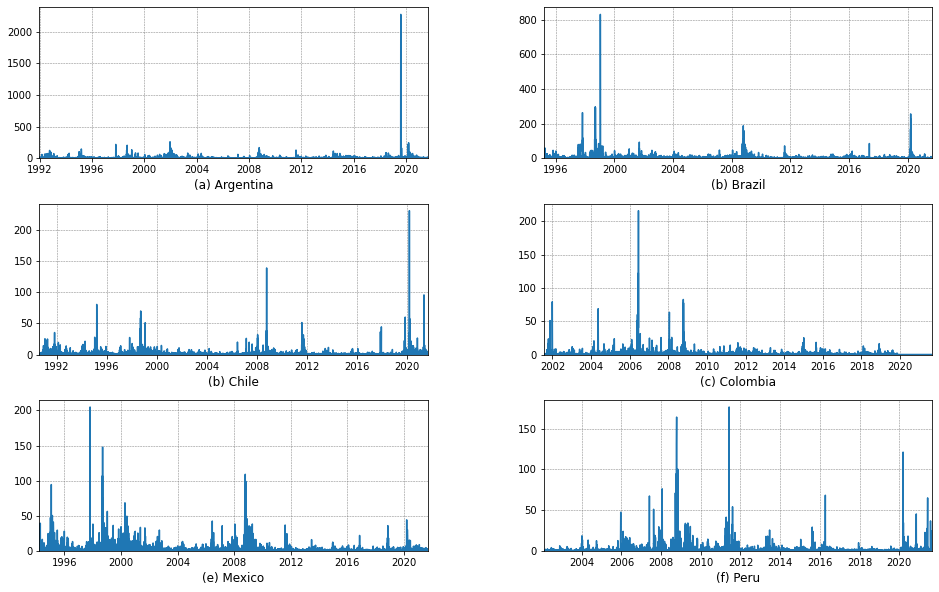

In [ ]:
graf_ret(r_stocks, country, ret2 = True)

plt.savefig('graph_stockSqrRet.pdf')

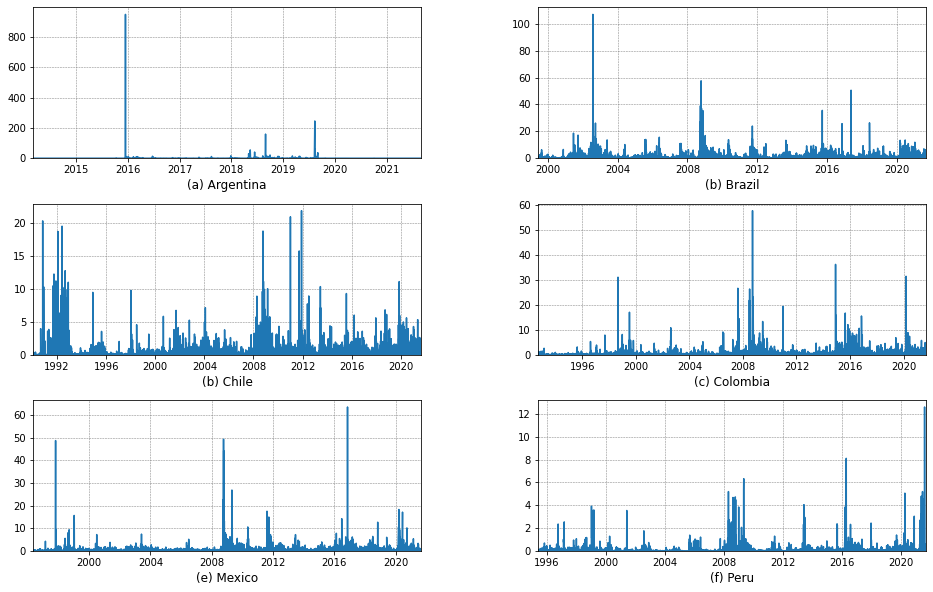

In [ ]:

graf_ret(r_forex, country, ret2 = True)

plt.savefig('graph_forexSqrRet.pdf')

In [ ]:
######################
# Obtencion de datos #
######################

path = 'https://git.io/JuGLW'

# Series del mercado bursatil

stocks  = pd.read_excel(path, sheet_name = 'stocks_raw', index_col = 0)
r_stocks = price2ret(stocks)

# Series del mercado cambiario
  
forex  = pd.read_excel(path, sheet_name = 'forex_raw', index_col = 0)
r_forex = price2ret(forex)

returns = r_forex.join(r_stocks)

In [ ]:
#graf_ret(r_forex, country, ret2 = False)

In [ ]:

# Series en niveles

graf_precio(r_stocks, country)
graf_precio(r_forex, country)


# Retornos 

graf_ret(r_stocks, country, ret2 = False)
graf_ret(r_forex, country, ret2 = False)


# Densidad

grafs_densidad(r_stocks, country, stock_name)
grafs_densidad(r_forex, country, forex_name)


# Autocorrelograma

grafs_acf(r_stocks, country)
grafs_acf(r_forex, country)


# Retornos al cuadrado

graf_ret(r_stocks, country, ret2 = True)
graf_ret(r_forex, country, ret2 = True)

# VaR vs Returns

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.rc("figure", figsize=(16, 6))

st = dt.datetime(1988, 1, 1)
en = dt.datetime(2018, 1, 1)

ax = returns.plot()
xlim = ax.set_xlim(returns.index.min(), returns.index.max())

NameError: ignored

In [ ]:

  nrows = np.ceil(df.shape[1] / 2).astype(int) 
  ncols = 2   
  fig, axes = plt.subplots(nrows, ncols, figsize=(16, 10))
  plt.subplots_adjust(wspace=0.3, hspace=0.3)

  # Generacion de subgraficos 

  for col, ax in zip(df.columns, axes.flatten()):

    serie = df[col].dropna()   # Serie

    # Subgrafico

    ax.plot(serie)

    # Preferencias

      # Limites horizontales
    ax.set_xlim([serie.index[0],serie.index[-1]]) 

      # Limites verticales 
    if ret2 == False:              # Se omite si son ret^2

      maxL = max(serie)
      minL = min(serie)

      rang = max(maxL, abs(minL))
      A = round(rang/10.0) * 10 + 10
      ax.set_ylim([-A, A])

    else:
      ax.set_ylim(0)

      # Etiquetas

    ax.set_xlabel(country[df.columns.get_loc(col)],fontname= 'Times New Roman', fontsize=12) 
    
    ax.grid(color="grey", linestyle="--", linewidth=0.5)